# <font color='blue'> Reinforcement Learning </font>

Reinforcement Learning is a powerful branch of Machine Learning. It is used to solve interacting problems where the data observed up to time t is considered to decide which action to take at time t + 1. It is also used for Artificial Intelligence when training machines to perform tasks such as walking. Desired outcomes provide the AI with reward, undesired with punishment. Machines learn through trial and error.

In this part, you will understand and learn how to implement the following Reinforcement Learning models:

- Upper Confidence Bound (UCB)

- Thompson Sampling


This process of interacting with an environment is what we are trying to reproduce
in terms of Artificial Intelligence. And to that extent, the branch of AI that works on
this is Reinforcement Learning.

## Upper Confidence Bound (UCB)

![UCB](UCB_Algorithm_Slide.png)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
data.shape

(10000, 10)

In [4]:
data.tail()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0
9999,0,1,0,0,0,0,0,0,0,0


In [ ]:
data.head()

In [ ]:
print(data.sum()) # so all the adds have been selected

## Implementing UCB

In [17]:
import math
N = 10000 #number of rounds
d = 10 #number of ads
ads_selected = [] #a list that contains the ads that user has clicked on it
numbers_of_selections = [0] * d #how many times users has clicked 
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
    
    ad = 0
    max_upper_bound = 0
    
    for i in range(0,d):
        
            if(numbers_of_selections[i] > 0):
                average_reward = sums_of_rewards[i]/numbers_of_selections[i]
                delta = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
                upper_bound = average_reward + delta
            
            else:
                upper_bound = 10e300
            
            if (max_upper_bound < upper_bound):
                max_upper_bound = upper_bound
                ad = i # to select the ad that has not been selected yet: after the first d-round this condition doesn't need to be checked
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

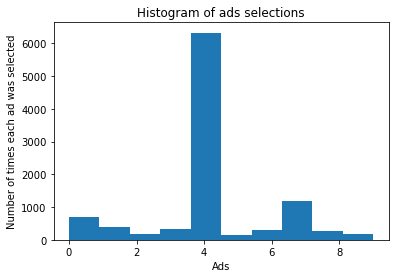

In [18]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

from the histogram we can clearly see that add number 5 is the one that the users has clicked on it the most.

we now examine our result to findout the smallest number of round that is needed for the UBCA to find out that the answer is ad 5. The sooner we discover the most favorit add the sooner we can lunch the campaign and collect the profit.

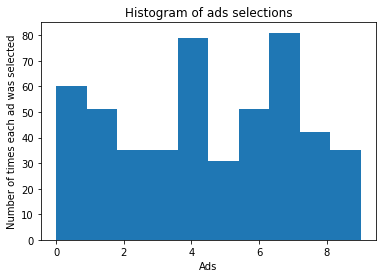

In [16]:
N = 500 
import math
d = 10 #number of ads
ads_selected = [] #a list that contains the ads that user has clicked on it
numbers_of_selections = [0] * d #how many times users has clicked 
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0 ):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta
        else: 
            upper_bound = 10e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

$N=500$ is not enough to findout which ad is the best.

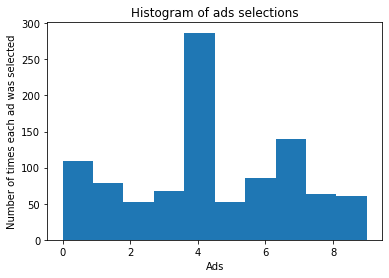

In [14]:
N = 1000
import math
d = 10 #number of ads
ads_selected = [] #a list that contains the ads that user has clicked on it
numbers_of_selections = [0] * d #how many times users has clicked 
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i] > 0 ):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta
        else: 
            upper_bound = 10e400
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n,ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

with $N=1000$ we can see that ad #5 is the one that most users has clicked on it. If we run for more round we gain more confidence in our choice of ad.